# Basic Audio Analysis

## Introduction

The purpose of this notebook is to provide a basic overview of simple audio analytics.
I worked with Claude to develop an initial curriculum, and I will be following it here.

## Topics Covered

### COMING SOON

## Audio Data Fundamentals

### 1. Basic Properties
- Number of samples in the audio file per second (e.g. 44.1kHz for CD-quality audio)
- Bit depth, i.e. number of bits used to represent each sample (e.g. 16-bit, 24-bit)
- Channels, e.g. mono or stereo

### 2. Common File Formats
- wav (uncompressed, high-qualitamp)
- mp3 (compressed, smaller file size)
- FLAC (a lossless compression approach and file type)

### 3. Audio preprocessing
- Resampling
- Normalization (i.e. of the amplitude of the audio)
- Noise Reduction (removing unwanted background noise)

### 4. Basic Feature Extraction
- Time-domain features, including zero-crossing rate, energy
- Frequency-domain features, including spectral centroid, spectral flux
- Mel-frequency cepstral coefficients (MFCCs) (common in speech recognition)

### 5. Popular Python Libraries
- librosa (feature extraction, audio loading, audio manipulation)
- pydub (audio file manipulation)
- scipy (signal processing)

### 6. Machine learning tasks for audio
- classification (e.g. genre, emotion)
- regression (e.g. age estimaton, audio quality assessment)
- segmentation (e.g. speaker diarization, music structure analysis)

### 7. Deep learning architectures for audio
- Convolutional Neural Networks (CNNs), e.g. with spectrograms
- Recurrent Neural Networks (RNNs), i.e. as audio is a sequence
- Transformers

### 8. Evaluation Metrics
- Classification (e.g. accuracy, F1-score, confusion matrix)
- Regression (e.g. mean squared error {MSE}, mean absolute error {MSE})
- Audio-specific (e.g. signal-to-noise ratio {SNR}, perceptual evaluation of speech quality {PESQ})

## Audio Data Samples

### Amplitude
An audio sample is a numeric value representing the amplitude of the sound wave at a specific point in time. In digital audio, these samples are typically stored as integers or floating point numbers. The range of these values depends on the bit depth (e.g. 16-bit audio allows for values from -32,768 tp 32,767).

### MP3, WAV, FLAC
MP3 is a lossy compression of WAV. WAV typically preserves all original audio data. FLAC stands for Free Lossless Audio Codec, and is the typical lossless compression of a WAV file.

### Features
- Zero-Crossing Rate: The rate at which the signal changes from positive to negative or vice-versa.
- RMS Energy: Represents the loudness of the signal
- Spectral Centroid: The "center of mass" of the spectrum, indicating the brightness of a sound.
- Spectral Rolloff: The frequency below which a certain percentage of the total spectral energy lies.
- MFCCs: These coefficients represent the short-term power spectrum of the sound, based on a linear cosine transformation of a log power spectrum on a nonlinear mel scale of the frequency

## Typical AI/ML Training Procedures For Audio

### Data Collection
- Gather dataset of audio relevant to the problem at hand
- Preprocessing

### Feature extraction
- Collection of basic features and any other features of interest

### Data splitting
- Create the train/validation/test datasets

### Model selection & training
- Choose model architecture
- Train model & tune on validation set

### Evaluation
- Determine appropriate metrics for the problem

### Iteration & optimization
- Refine model, features, and/or data based on results

## Exploring Basic Audio Processing

### Create & load your virutal environment

```bash
cd ~/python_env/
python -m venv basic_audio_env
source basic_audio_env/bin/activate
```

### Install required packages

Clone the *asabaal-utils* repo:

```bash
cd ~/repos
git clone git@github.com:asabaal/asabaal-utils.git
```

pip install the necessary packages

```bash
pip install librosa numpy matplotlib
cd asabaal-utils
pip install .
```

### Import & Configure the necessary packages

In [1]:
import librosa
import librosa.display
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from basic_audio_analytics import (WaveformPlotter, 
                                   SpectrogramPlotter, 
                                   FramingVisualizer, 
                                   AmplitudePlotter,
                                   MelVisualizer,
                                   VocalRangeVisualizer,
                                   MFCCPlotter,
                                   FramingProcessVisualizer,
                                   OverlapAnalyzer,
                                   create_test_signal)
from scipy.signal.windows import hamming

plt.style.use('dark_background')

In [2]:
# Set the host directory of your notebook
host_dir: str = "/home/asabaal/asabaal_ventures/repos/basic-audio-analytics"
host_dir

'/home/asabaal/asabaal_ventures/repos/basic-audio-analytics'

In [3]:
# Load an audio file
# For this example, I'm going to use my debut song, Electric Pulse, and it is in the data directory of this repository
audio_path: str = os.path.join(host_dir, "data/ElectricPulse.wav")
amplitude: np.ndarray
sr: int
amplitude, sample_rate = librosa.load(audio_path)
print(f"Amplitude shape: {amplitude.shape}")
print(f"Sample rate: {sample_rate}")

Amplitude shape: (4696650,)
Sample rate: 22050


In [4]:
# Create test signal
signal, sr = create_test_signal()

# Initialize plotters
waveform_plotter = WaveformPlotter()
spec_plotter = SpectrogramPlotter()
frame_viz = FramingVisualizer()
amplitude_viz = AmplitudePlotter()
mel_viz = MelVisualizer()
vocal_viz = VocalRangeVisualizer()
mfcc_viz = MFCCPlotter()
frame_viz = FramingProcessVisualizer()
overlap_viz = OverlapAnalyzer()

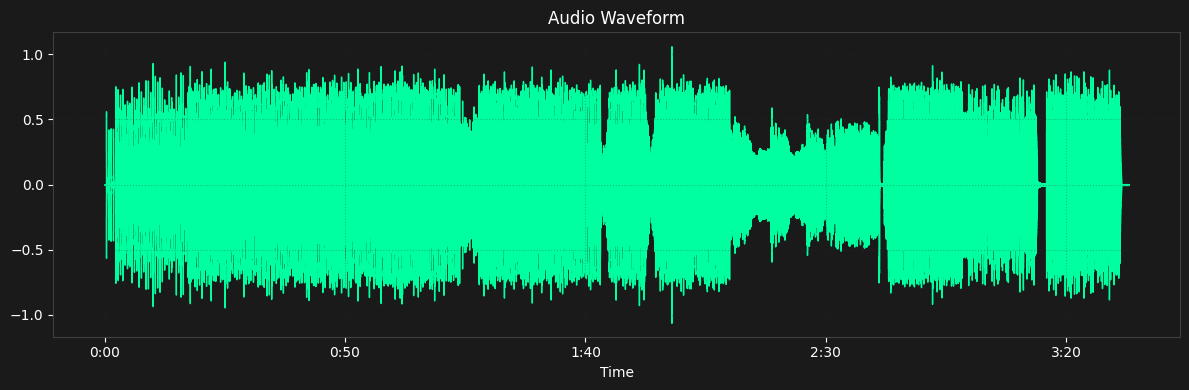

In [5]:
# Create visualizations
waveform_plotter.plot_waveform(amplitude, sample_rate)

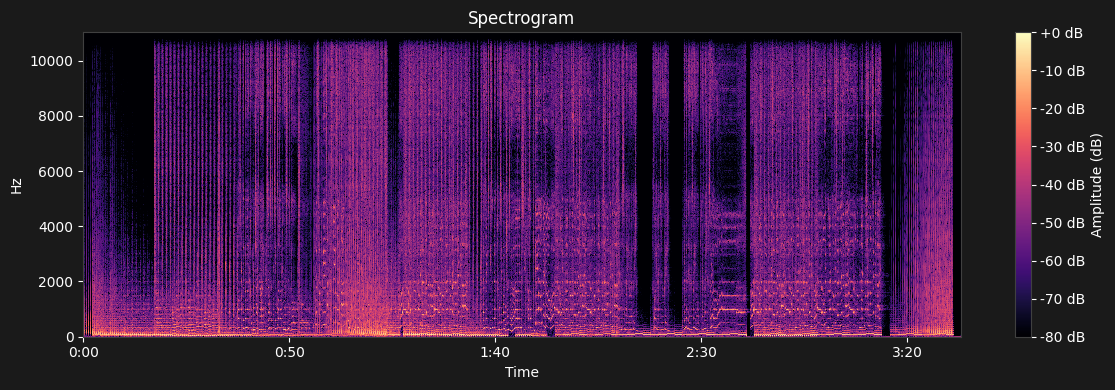

In [6]:
# Create spectrogram data
D = librosa.stft(amplitude)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
spec_plotter.plot_spectrogram(S_db, sample_rate)

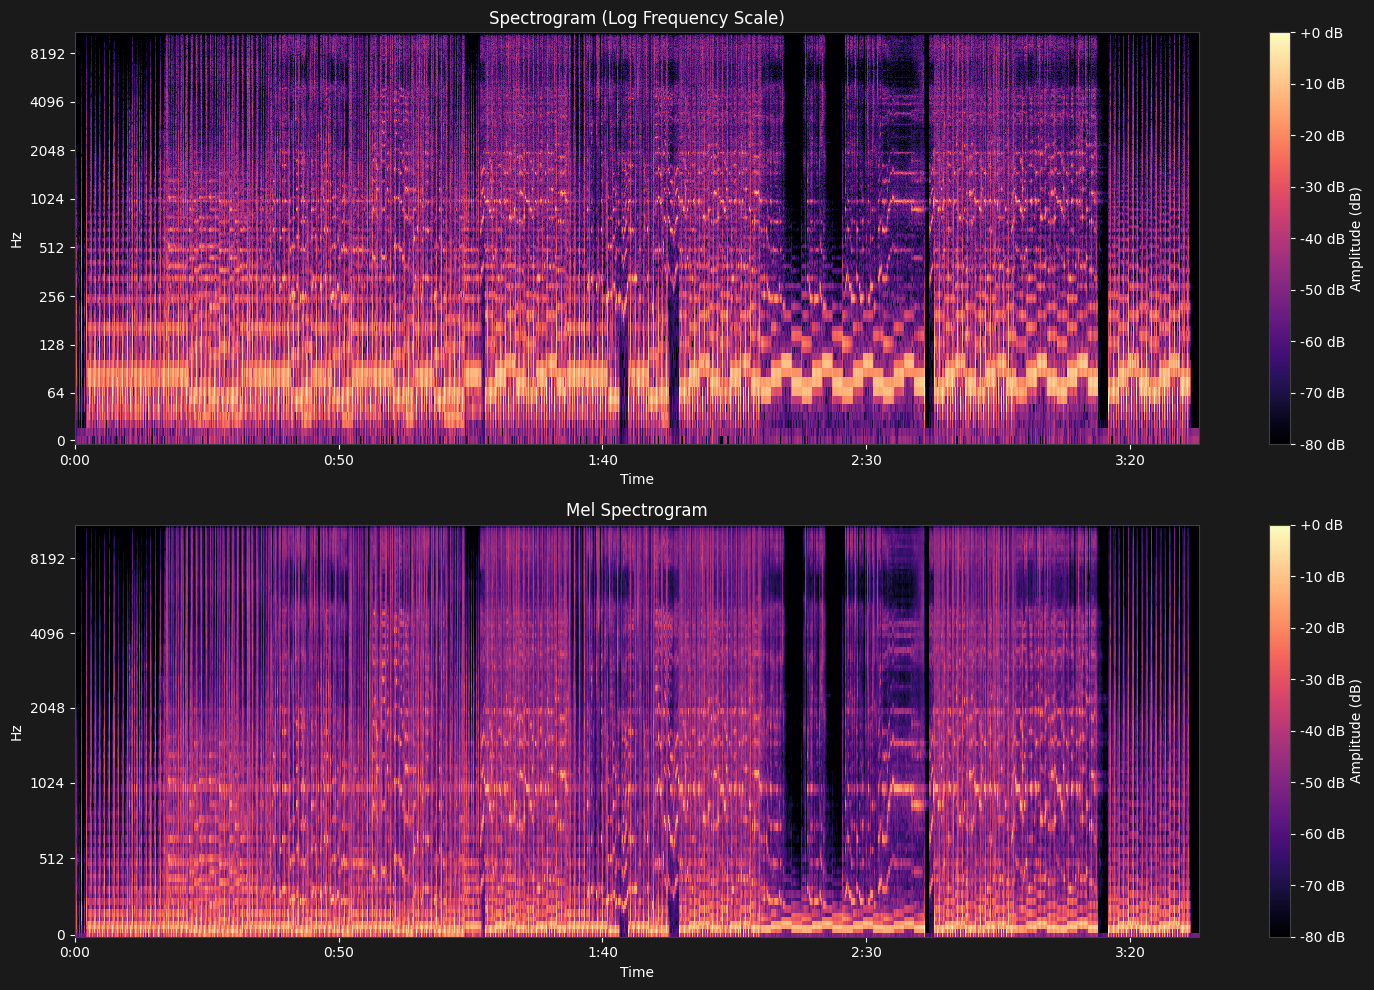

In [7]:
spec_plotter.plot_log_spectrograms(amplitude, S_db, sample_rate)

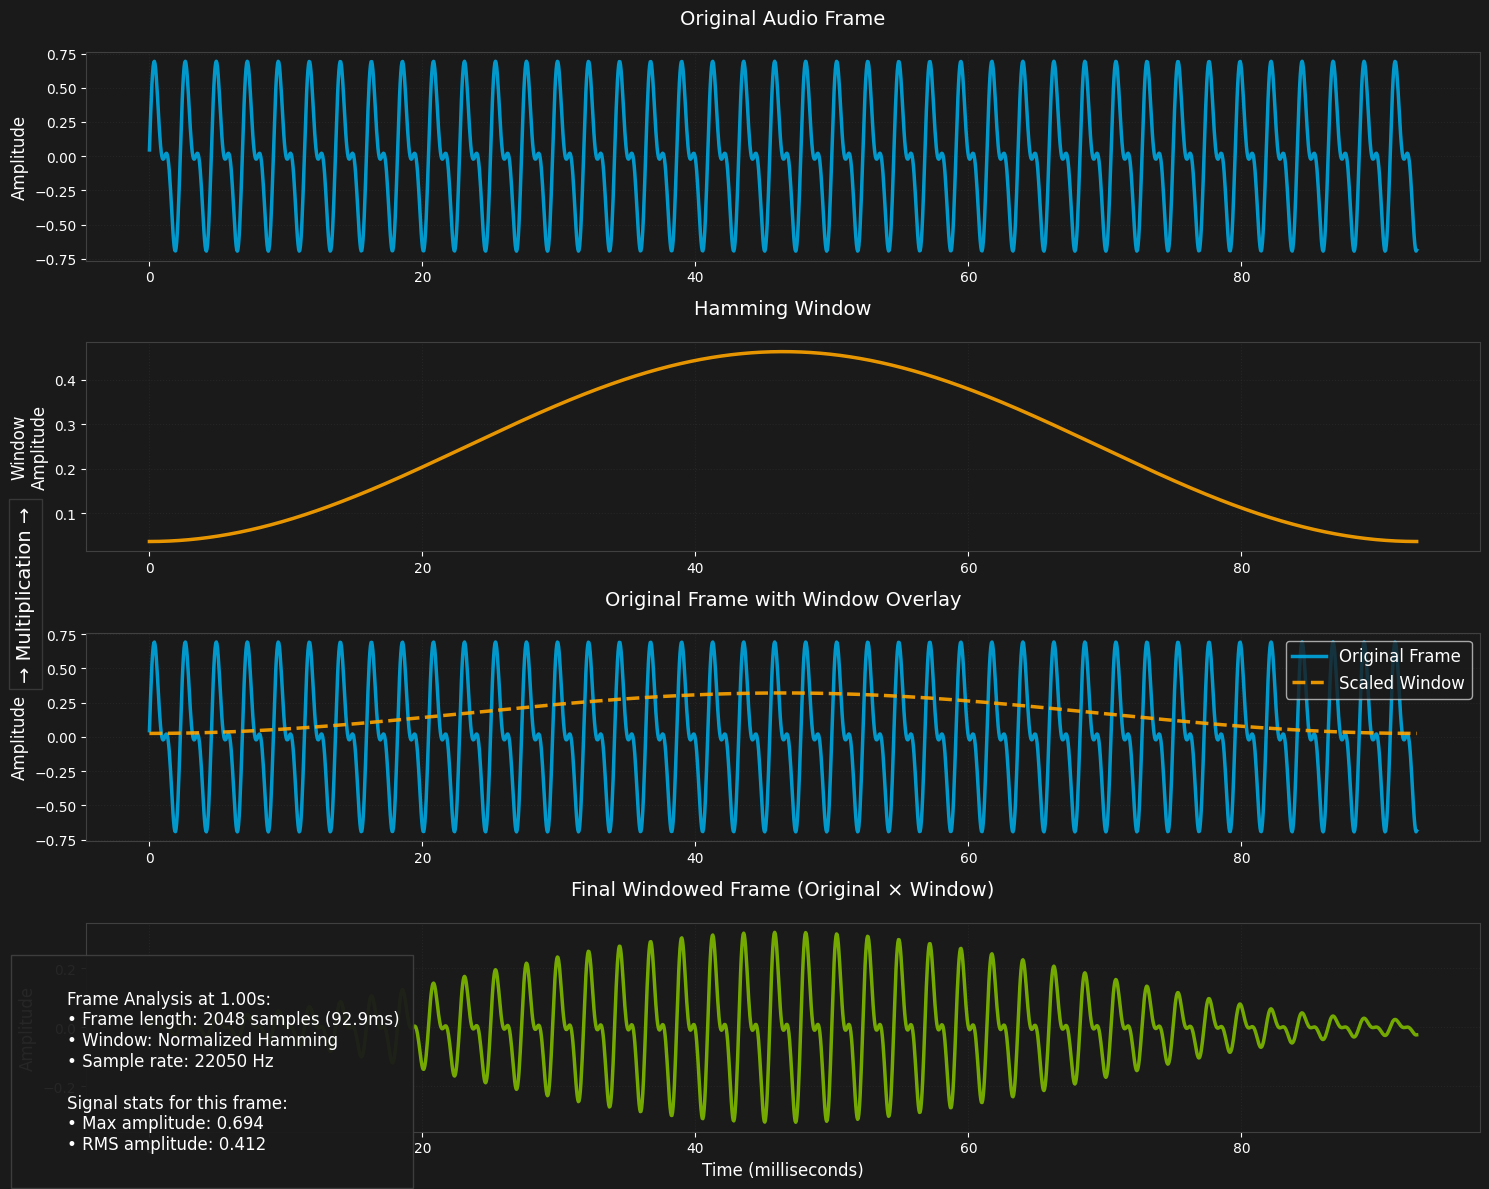

In [8]:
# Visualize framing
frame_viz.visualize_windowing_effect(signal, sr, start_time=1.0)

In [9]:
# Calculate statistics
stats = pd.Series(amplitude).describe()

# Create a styled DataFrame display
styled_stats = pd.DataFrame(stats).round(6).rename(columns={0: 'Value'})
styled_stats.index = [
    'Total Samples',
    'Mean Amplitude',
    'Standard Deviation',
    'Minimum',
    '25th Percentile',
    'Median',
    '75th Percentile',
    'Maximum'
]

print("Audio Amplitude Statistics (Scientific Notation)")
print("=" * 60)
for idx, row in styled_stats.iterrows():
    print(f"{idx:<20} : {row['Value']:>12.2e}")
print("=" * 60)

Audio Amplitude Statistics (Scientific Notation)
Total Samples        :     4.70e+06
Mean Amplitude       :     9.10e-04
Standard Deviation   :     2.16e-01
Minimum              :    -9.16e-01
25th Percentile      :    -1.21e-01
Median               :    -1.69e-03
75th Percentile      :     1.21e-01
Maximum              :     1.06e+00


In [10]:
# Calculate statistics
stats = pd.Series(amplitude).abs().describe()

# Create a styled DataFrame display
styled_stats = pd.DataFrame(stats).round(6).rename(columns={0: 'Value'})
styled_stats.index = [
    'Total Samples',
    'Mean Amplitude',
    'Standard Deviation',
    'Minimum',
    '25th Percentile',
    'Median',
    '75th Percentile',
    'Maximum'
]

print("Audio Amplitude Statistics (Scientific Notation)")
print("=" * 60)
for idx, row in styled_stats.iterrows():
    print(f"{idx:<20} : {row['Value']:>12.2e}")
print("=" * 60)

Audio Amplitude Statistics (Scientific Notation)
Total Samples        :     4.70e+06
Mean Amplitude       :     1.61e-01
Standard Deviation   :     1.44e-01
Minimum              :     0.00e+00
25th Percentile      :     5.02e-02
Median               :     1.21e-01
75th Percentile      :     2.26e-01
Maximum              :     1.06e+00


In [11]:
pd.Series(amplitude).abs().min()

np.float32(1.0186341e-08)

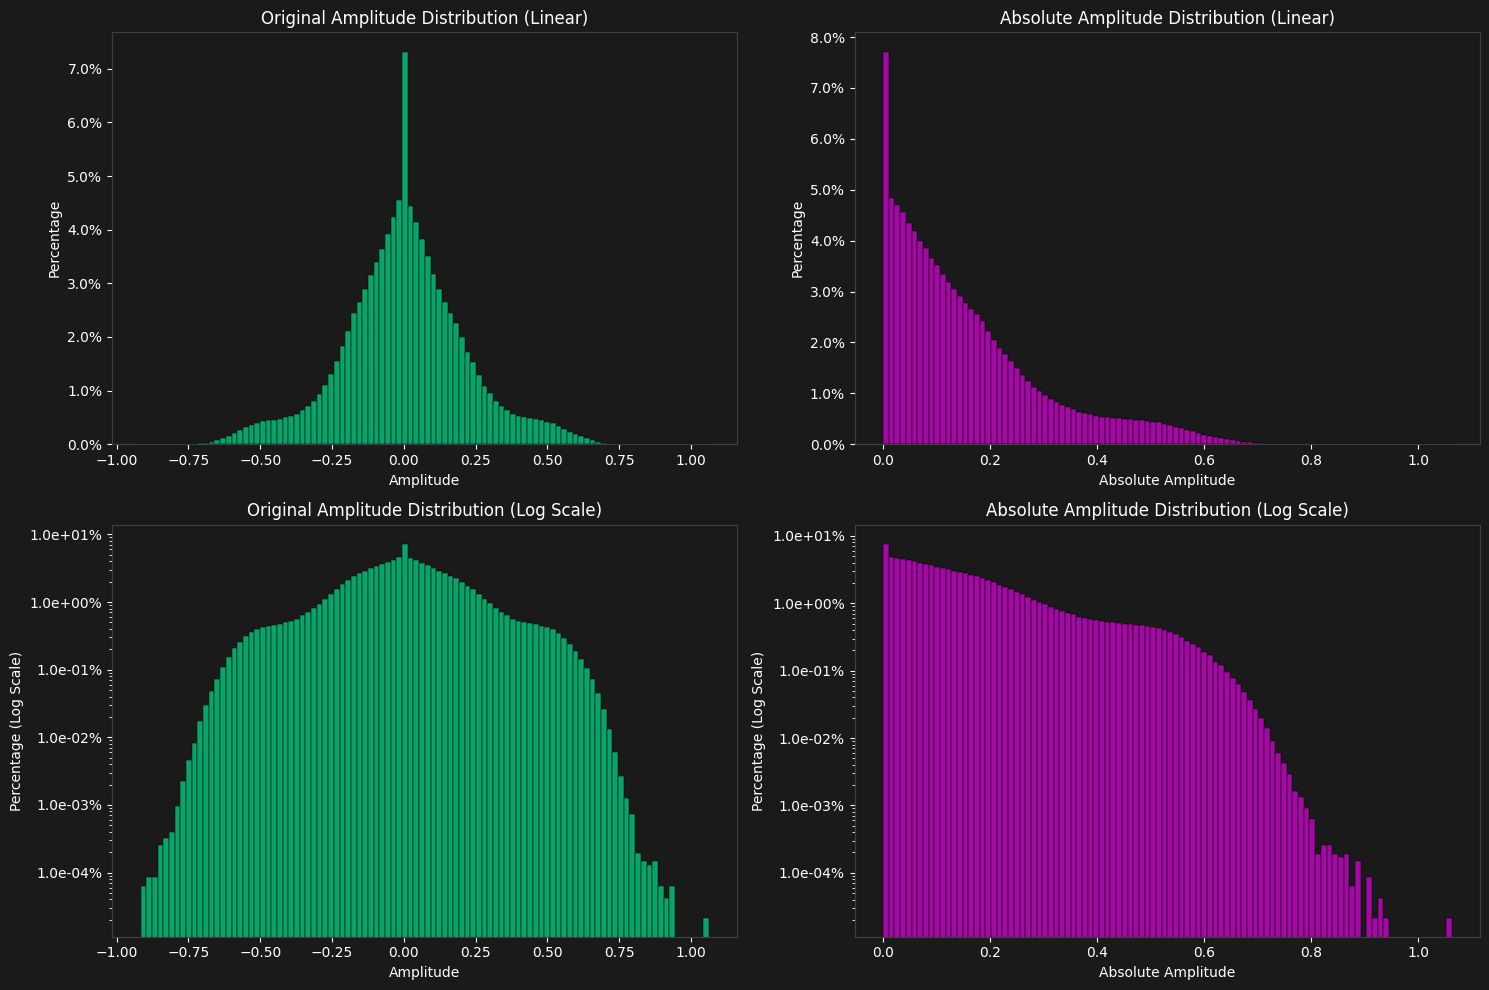

In [12]:
amplitude_viz.plot_amplitude_distributions(amplitude)

### A Quick Note on the Mel Scale

```python
# The standard formula for converting Hz to Mels
m = 2595 * np.log10(1 + f/700)

# And the inverse (Mels back to Hz)
f = 700 * (10**(m/2595) - 1)
```

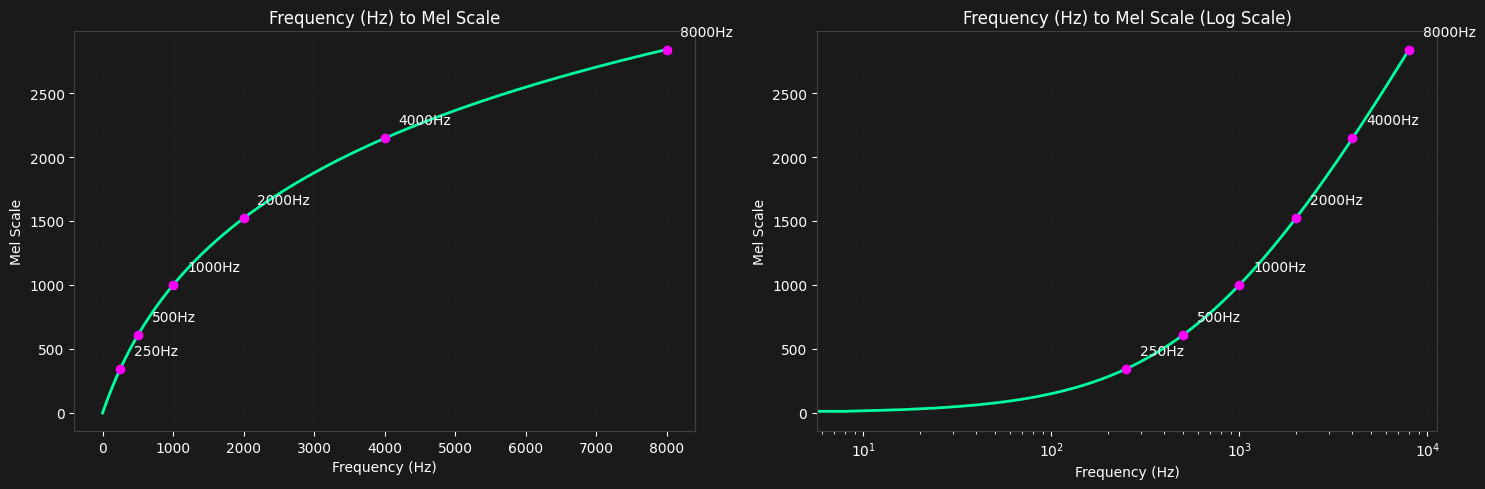


Reference conversions from Hz to Mels:
 100 Hz = 150 Mels
 500 Hz = 607 Mels
1000 Hz = 1000 Mels
2000 Hz = 1521 Mels
4000 Hz = 2146 Mels
8000 Hz = 2840 Mels


In [13]:
mel_viz.plot_mel_conversion()

# Print some reference values
print("\nReference conversions from Hz to Mels:")
for hz in [100, 500, 1000, 2000, 4000, 8000]:
    mels = 2595 * np.log10(1 + hz/700)
    print(f"{hz:4d} Hz = {mels:.0f} Mels")

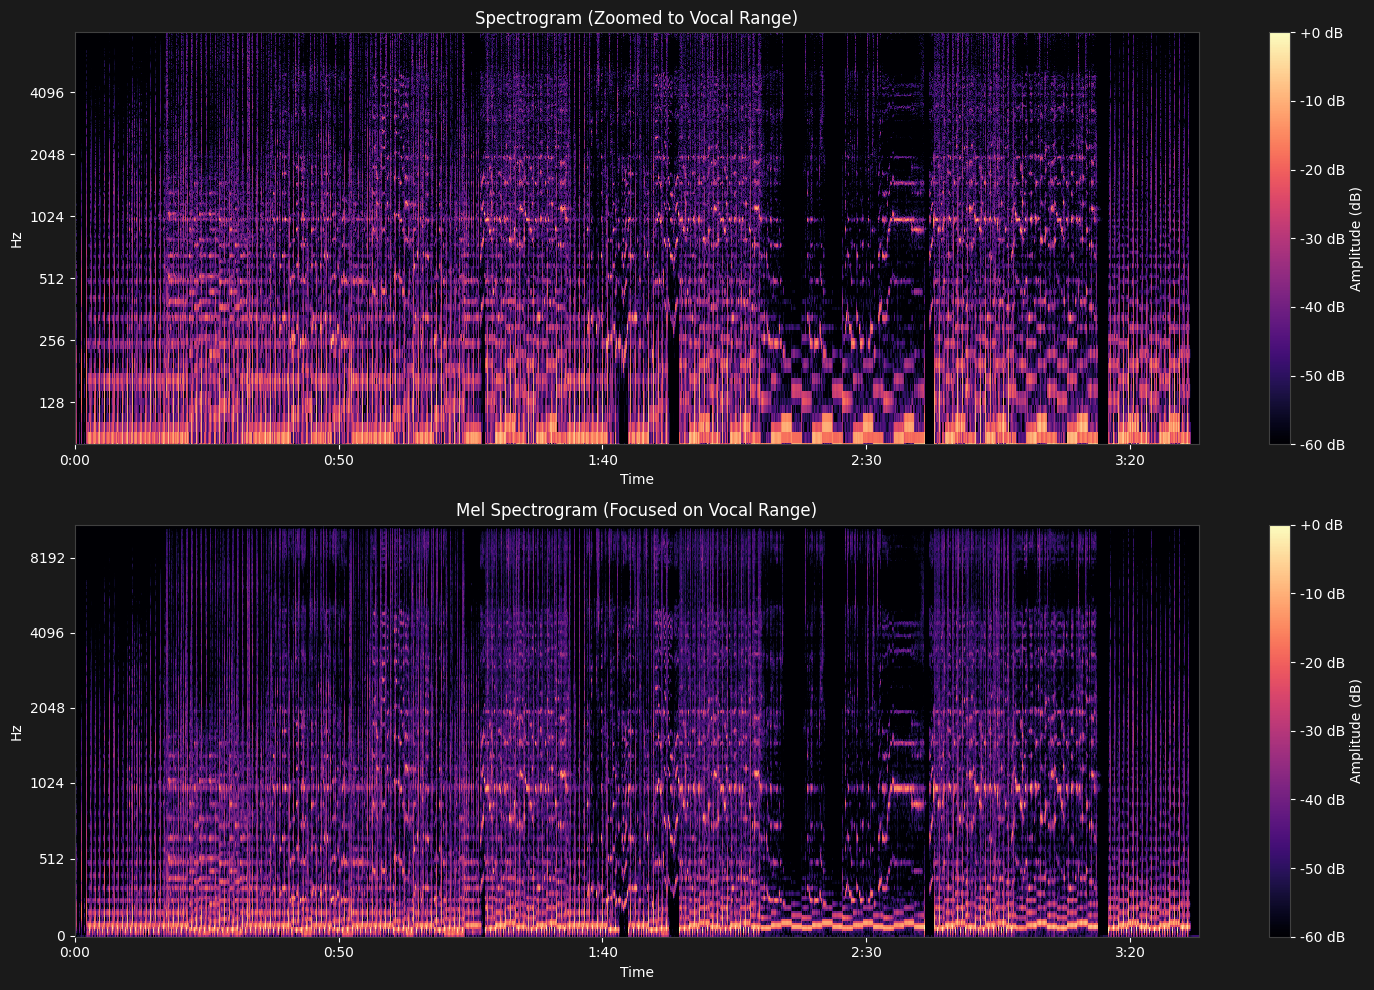

In [14]:
vocal_viz.plot_vocal_range_spectrograms(amplitude, S_db, sample_rate)

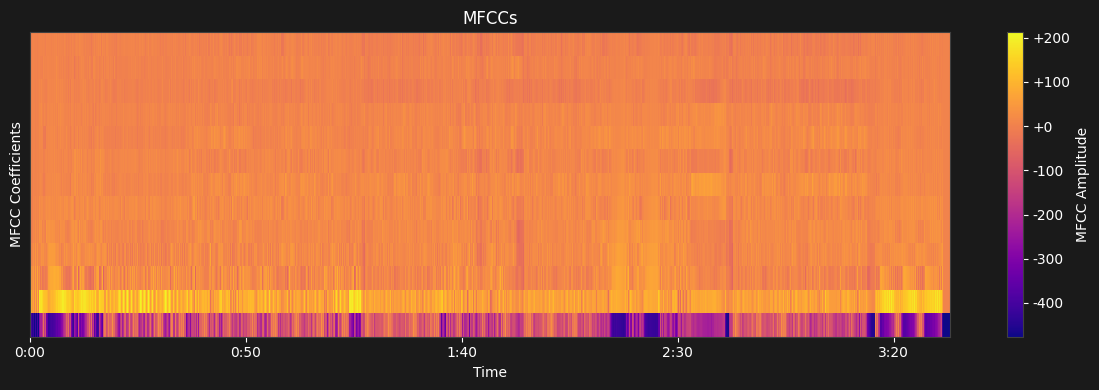

In [15]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=amplitude, sr=sample_rate, n_mfcc=13)

mfcc_viz.plot_mfccs(mfccs, sample_rate)

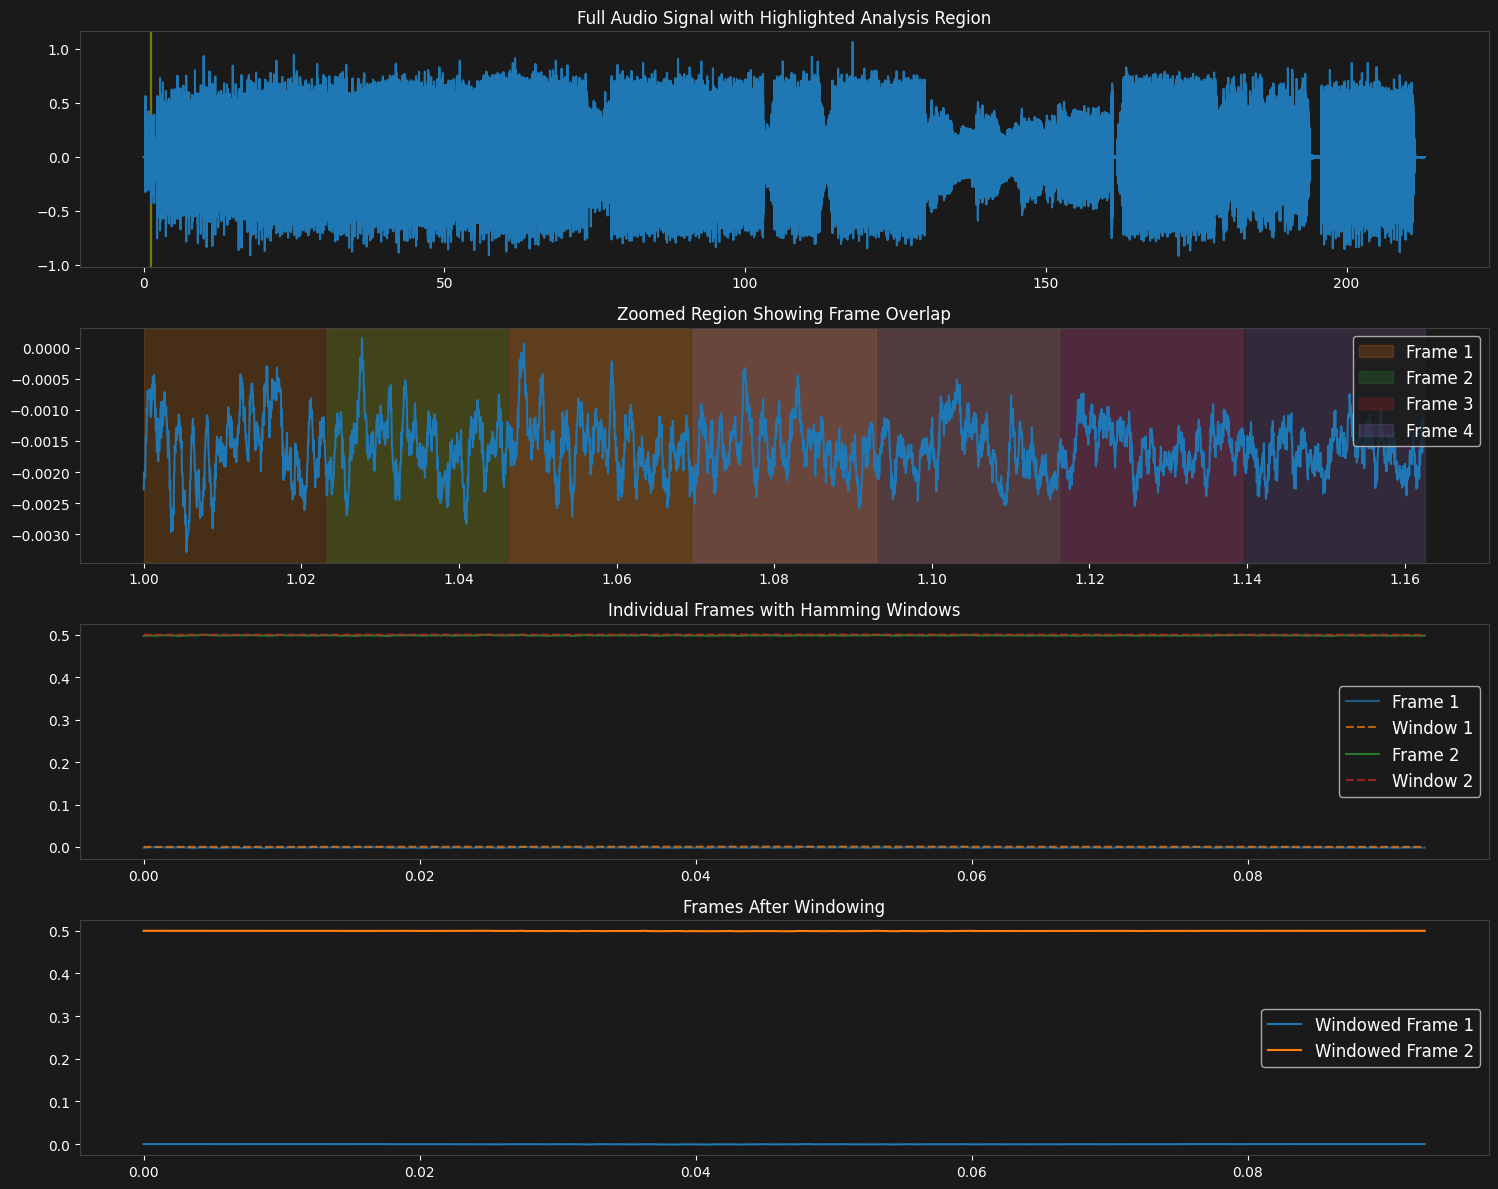

In [16]:
# Show the framing process
frame_viz.visualize_framing_process(amplitude, sample_rate)

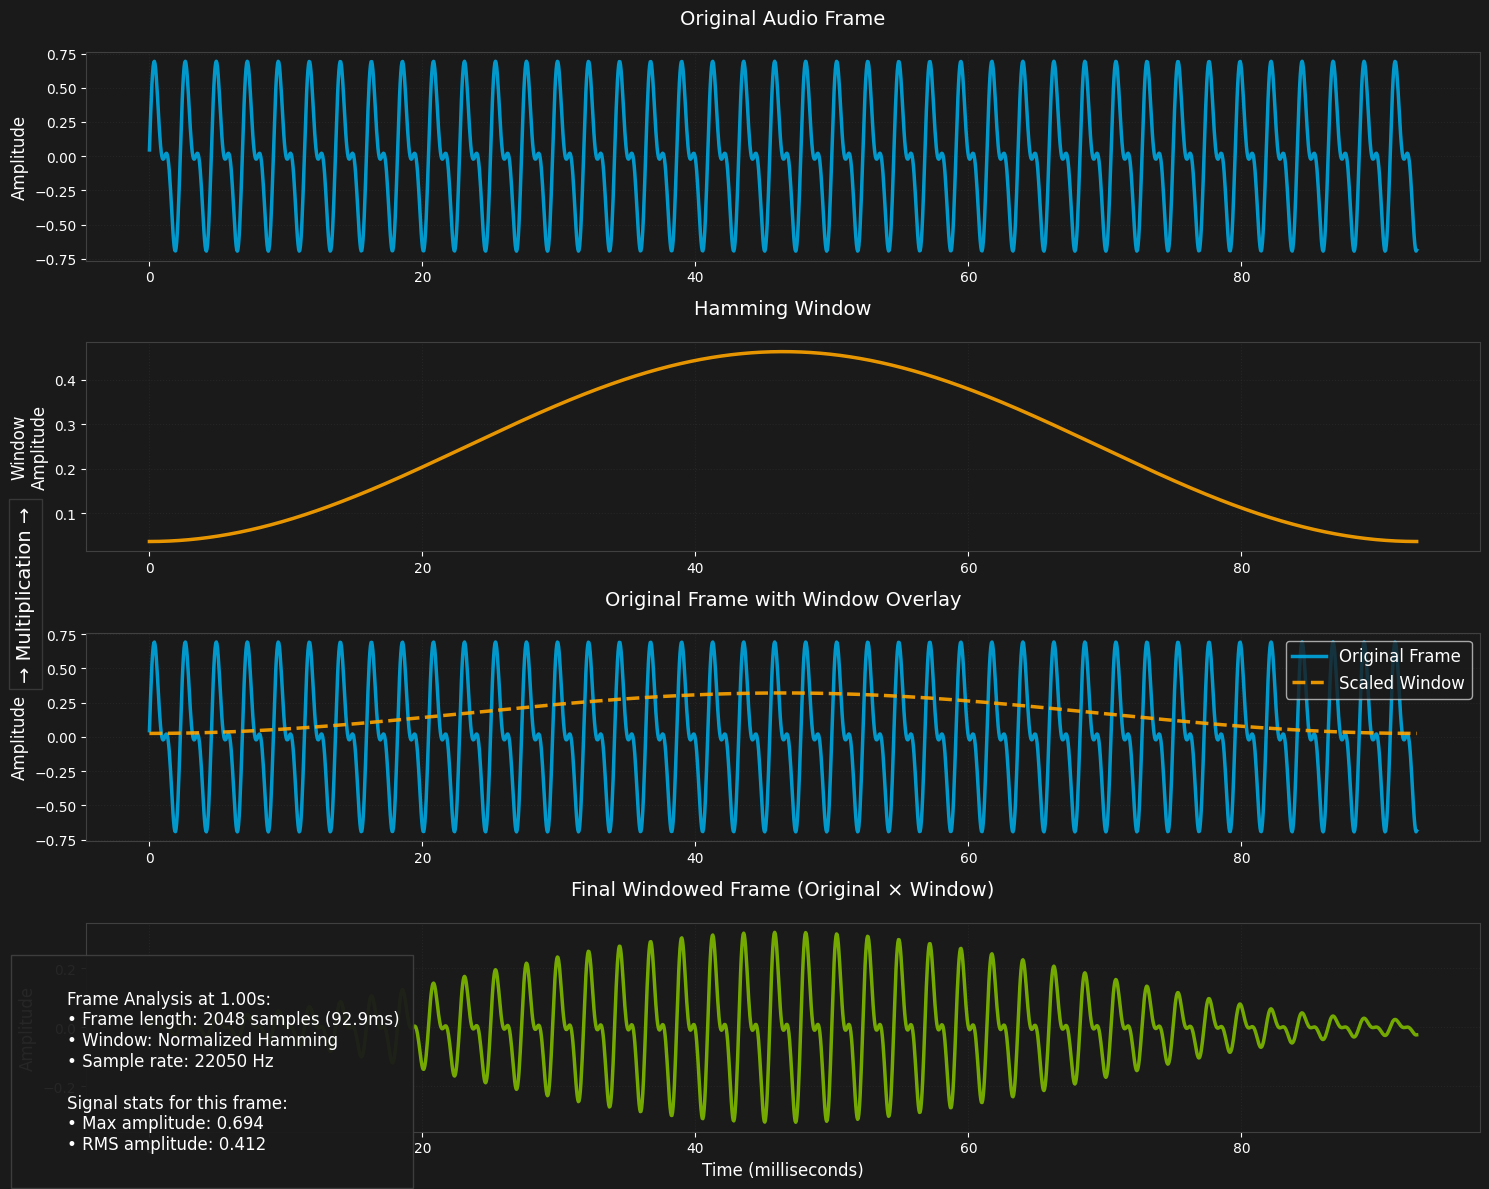

In [17]:
# Create a test signal
test_signal, sr = create_test_signal()

# Visualize the windowing effect
frame_viz.visualize_windowing_effect(test_signal, sr)

/home/asabaal/asabaal_ventures/repos/basic-audio-analytics/src/basic_audio_analytics/base.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(fontsize=fontsize, framealpha=0.8)


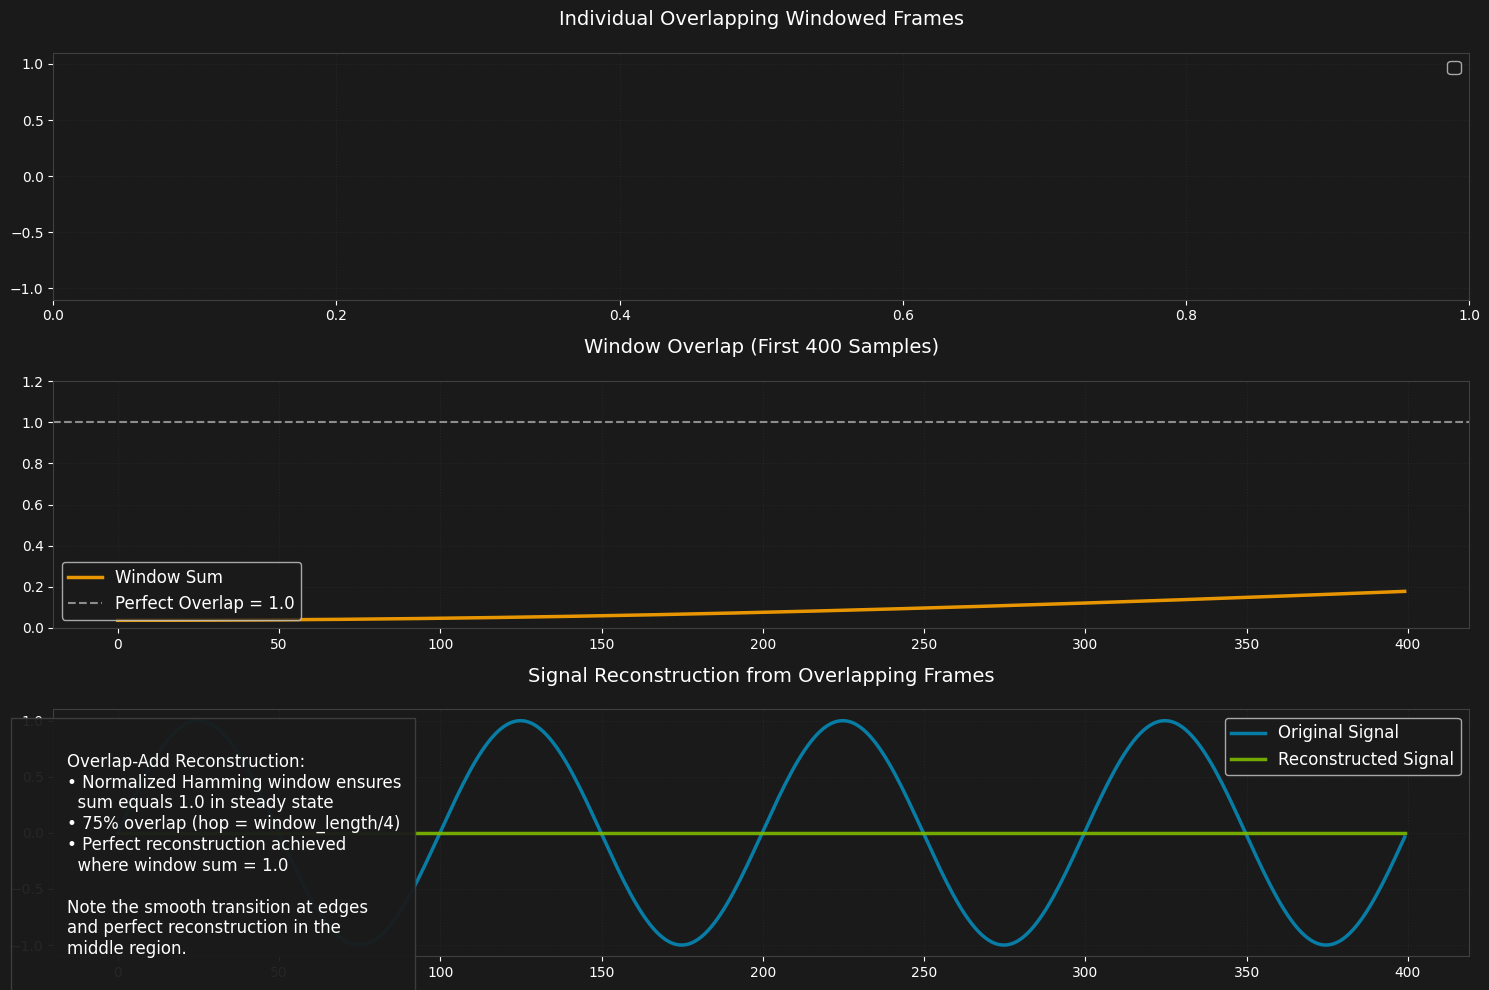

In [18]:
# Show the overlap effect
overlap_viz.plot_overlap_effect()

In [17]:
sample_rate

22050

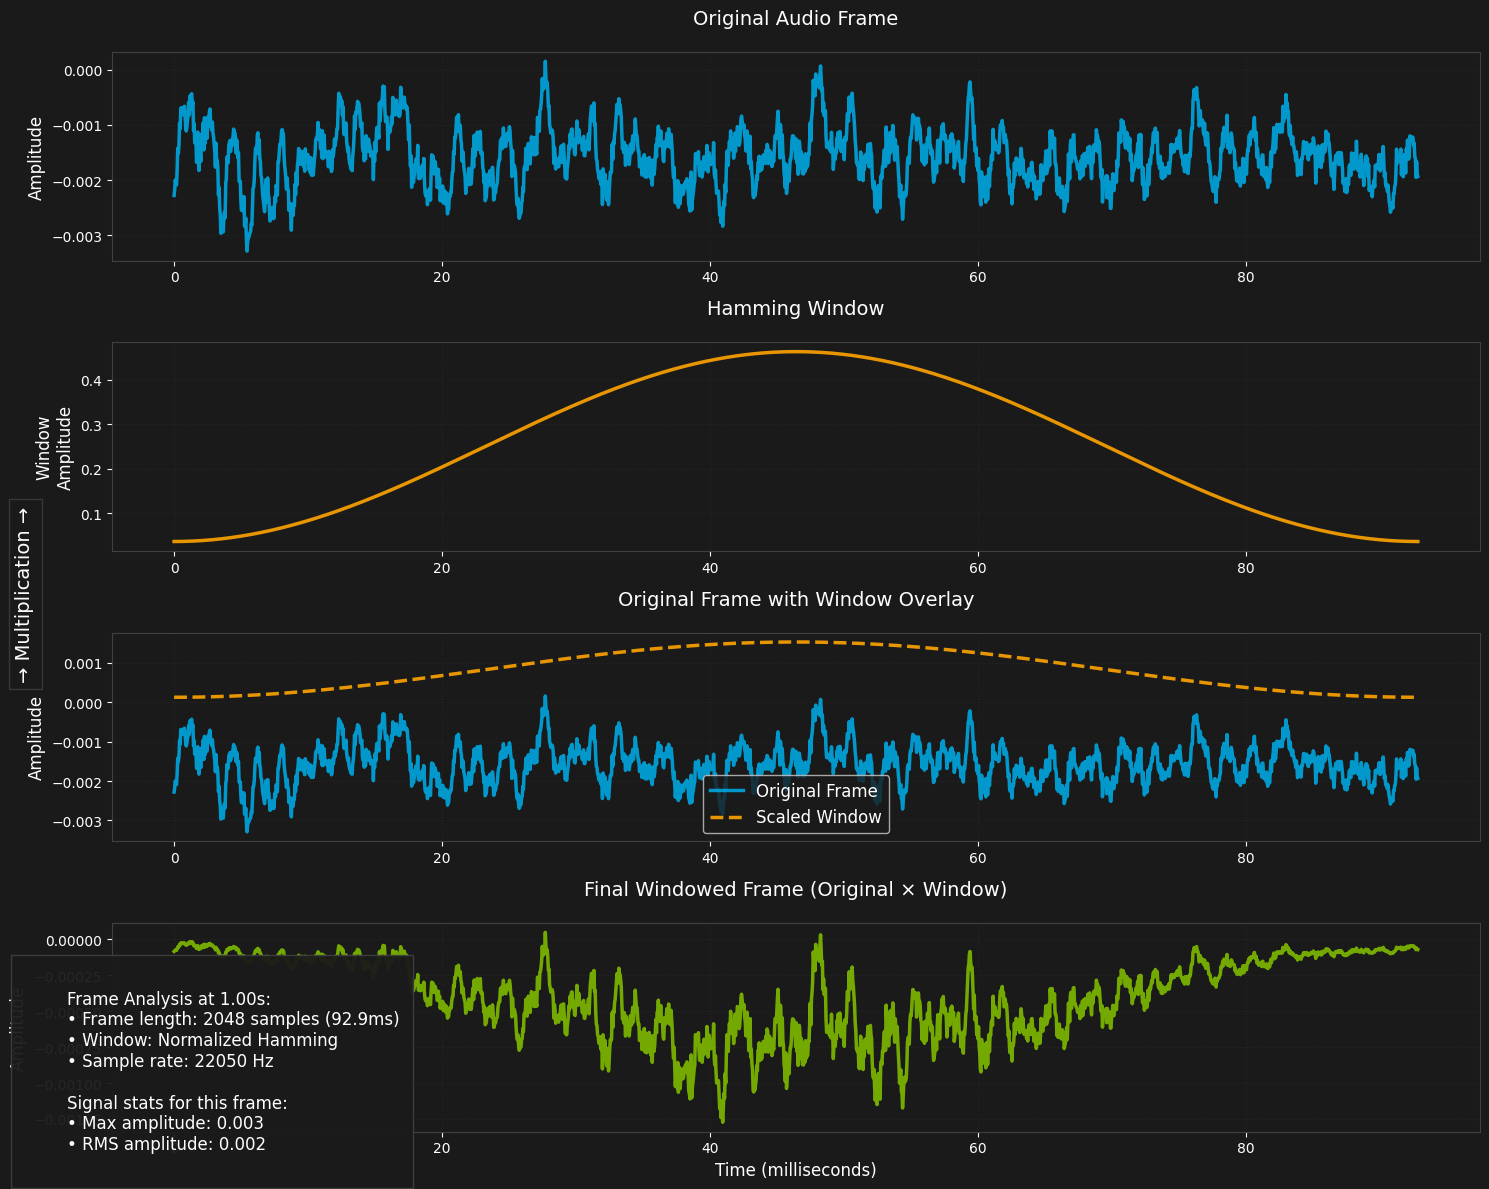

In [19]:
frame_viz.visualize_windowing_effect(amplitude, sample_rate)

ValueError: zero-size array to reduction operation minimum which has no identity

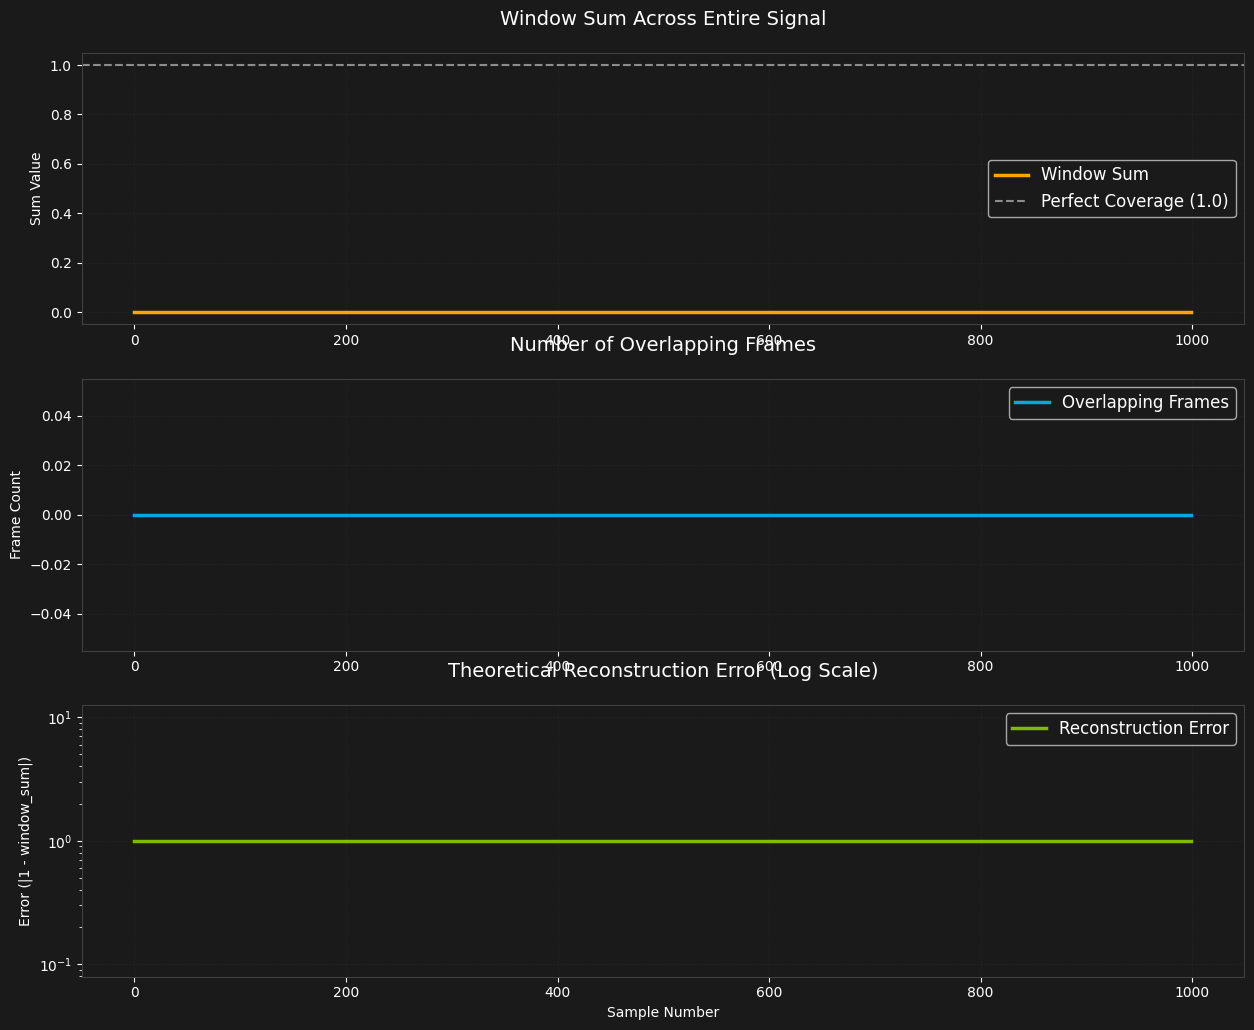

In [20]:
# Run the analysis
overlap_viz.analyze_window_coverage()

In [20]:
# Compute zero-crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(amplitude)
print(f"Zero-crossing rate: {zero_crossings.mean()}")

Zero-crossing rate: 0.06392215772836277


In [21]:

# Compute spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=amplitude, sr=sample_rate)
print(f"Spectral centroid: {spectral_centroids.mean()}")

Spectral centroid: 2268.1802501532575


In [22]:
frame_length = 2048  # ~46ms at 44.1kHz
hop_length = 512    # 75% overlap
window = hamming(512) #hamming function of length 512
window = window / np.sum(window[::hop_length])
#pd.Series(amplitude)

In [23]:
def apply_hamming_window(signal, frame_length=2048, hop_length=512):
    """Apply a Hamming window to a signal with overlap-add"""
    window = hamming(frame_length)
    window = window / np.sum(window[::hop_length])
    
    # Pre-allocate output array
    windowed_signal = np.zeros_like(signal)
    
    # Process all frames for full reconstruction
    for i in range((len(signal) - frame_length) // hop_length + 1):
        start = i * hop_length
        frame = signal[start:start + frame_length]
        if len(frame) == frame_length:
            windowed_frame = frame * window
            windowed_signal[start:start + frame_length] += windowed_frame
    
    return windowed_signal
pd.Series(amplitude).rolling(window=2048).agg(apply_hamming_window)

TypeError: only length-1 arrays can be converted to Python scalars

In [25]:

# Onset detection
onset_frames = librosa.onset.onset_detect(y=amplitude, sr=sample_rate)
onset_times = librosa.frames_to_time(onset_frames, sr=sample_rate)
print(f"Detected onsets at: {onset_times}")

Detected onsets at: [  0.32507937   0.81269841   1.30031746   1.76471655   2.2523356
   2.5077551    2.73995465   2.99537415   3.2275737    3.4829932
   3.71519274   3.94739229   4.17959184   4.43501134   4.66721088
   4.92263039   5.15482993   5.41024943   5.64244898   5.89786848
   6.13006803   6.38548753   6.61768707   6.84988662   7.10530612
   7.33750567   7.56970522   7.82512472   8.05732426   8.31274376
   8.54494331   8.80036281   9.03256236   9.2647619    9.52018141
   9.75238095  10.00780045  10.24        10.37931973  10.4954195
  10.61151927  10.72761905  10.95981859  11.2152381   11.33133787
  11.44743764  11.58675737  11.70285714  11.93505669  12.19047619
  12.30657596  12.42267574  12.56199546  12.67809524  12.91029478
  13.14249433  13.28181406  13.39791383  13.63011338  13.86231293
  14.11773243  14.2338322   14.34993197  14.4892517   14.60535147
  14.83755102  15.06975057  15.20907029  15.32517007  15.4644898
  15.55736961  15.81278912  16.04498866  16.18430839  16.300